#### **[데이터마이닝] Assignment 5: CLASSIFICATION**
**<font color='grey'> 2019 55718 | Melia Putri Handayani (멜리아 푸트리 한다야니)**

##### **과제 문제**


**첨부 파일 (Adult 자료분석-수정-2018-05-05.txt )에 나와 있는 Adult 자료를 대상으로** 
> (Attachment
(Adult Data Analysis-Modify-2018-05-05.txt ) targets Adult data)**

1. 다음 방법들을 사용하여 분류 문제를 풀어보고 서로 비교하시오
> (Use the following methods to solve classification problems and compare them with each other)

  a. 로지스틱 회귀방법 (Logistic regression method)

  b. SVM (Support Vector Machine)

  c. 랜덤 포레스트 (Random Forest)

  d. k-NN (k-Nearest Neighbors)

  e. DNN (Deep Neural Network)

    * tensorflow와 라이브러리 'sklearn'을 사용하시오. 
    > (Use tensorflow and library 'Sklearn')
    * 교차타당성 (중첩 교차 검증)을 실시하시오. 
    > (Cross-feasibility test (intermediate cross-validation))
    * 비교시 분류기를 평가하는 각 종 지표 (혼돈행렬, 오분류율, 정확도, 민감도, 특이도, ROC 곡선, AUC, F1 score, recall, 정밀도 (precision) 등)를 사용하시오. 
    > (Use each species index (conflict matrix, misclassification rate, accuracy, sensitivity,
specificity, ROC curve, AUC, F1 square, recall, precision, etc.) to evaluate the classifier in
comparison)

2. 로지스틱 회귀방법에서 L1 규제를 통한 특성 선택을 시도하고, 랜덤 포레스트를 사용하여 특성 중
요도를 계산하고 서로 비교하시오
> (Try to select characteristics through L1 regulation in logistic regression method and use random
forest to calculate and compare character importance with each other)

##### **DATA PROCESSING**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [99]:
url='https://drive.google.com/uc?export=download&id=153aMLlWJ6c_eb_nEXetlL_Yl4oog08Mj'
df=pd.read_csv(url)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#####**Data Info**

In [100]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [102]:
age=np.unique(df['age'].values)
age

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90])

In [103]:
workclass=np.unique(df['workclass'].values)
map_workclass=pd.DataFrame(workclass,columns=['map_workclass'])
workclass

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [104]:
fnlwgt=np.unique(df['fnlwgt'].values)
fnlwgt

array([  12285,   13769,   14878, ..., 1366120, 1455435, 1484705])

In [105]:
education=np.unique(df['education'].values)
map_education=pd.DataFrame(education,columns=['map_education'])
education

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [106]:
edu_num=np.unique(df['education-num'].values)
edu_num

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [107]:
status=np.unique(df['marital-status'].values)
map_status=pd.DataFrame(status,columns=['map_status'])
status

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [108]:
occupation=np.unique(df['occupation'].values)
map_occupation=pd.DataFrame(occupation,columns=['map_occupation'])
occupation

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [109]:
relationship=np.unique(df['relationship'].values)
map_relationship=pd.DataFrame(relationship,columns=['map_relationship'])
relationship

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [110]:
race=np.unique(df['race'].values)
map_race=pd.DataFrame(race,columns=['map_race'])
race

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

In [111]:
sex=np.unique(df['sex'].values)
map_sex=pd.DataFrame(sex,columns=['map_sex'])
sex

array([' Female', ' Male'], dtype=object)

In [112]:
c_gain=np.unique(df['capital-gain'].values)
c_gain

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999])

In [113]:
c_loss=np.unique(df['capital-loss'].values)
c_loss

array([   0,  155,  213,  323,  419,  625,  653,  810,  880,  974, 1092,
       1138, 1258, 1340, 1380, 1408, 1411, 1485, 1504, 1539, 1564, 1573,
       1579, 1590, 1594, 1602, 1617, 1628, 1648, 1651, 1668, 1669, 1672,
       1719, 1721, 1726, 1735, 1740, 1741, 1755, 1762, 1816, 1825, 1844,
       1848, 1876, 1887, 1902, 1944, 1974, 1977, 1980, 2001, 2002, 2042,
       2051, 2057, 2080, 2129, 2149, 2163, 2174, 2179, 2201, 2205, 2206,
       2231, 2238, 2246, 2258, 2267, 2282, 2339, 2352, 2377, 2392, 2415,
       2444, 2457, 2467, 2472, 2489, 2547, 2559, 2603, 2754, 2824, 3004,
       3683, 3770, 3900, 4356])

In [114]:
hpw=np.unique(df['hours-per-week'].values)
hpw

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99])

In [115]:
country=np.unique(df['country'].values)
map_country=pd.DataFrame(country,columns=['map_country'])
country

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

In [116]:
salary=np.unique(df['salary'].values)
map_salary=pd.DataFrame(salary,columns=['map_salary'])
salary

array([' <=50K', ' >50K'], dtype=object)

#####**Data Exploration**

(array([15856.,  1175.,  2237.,  7291.,  2449.,   646.,   989.,   333.,
         1101.,   484.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

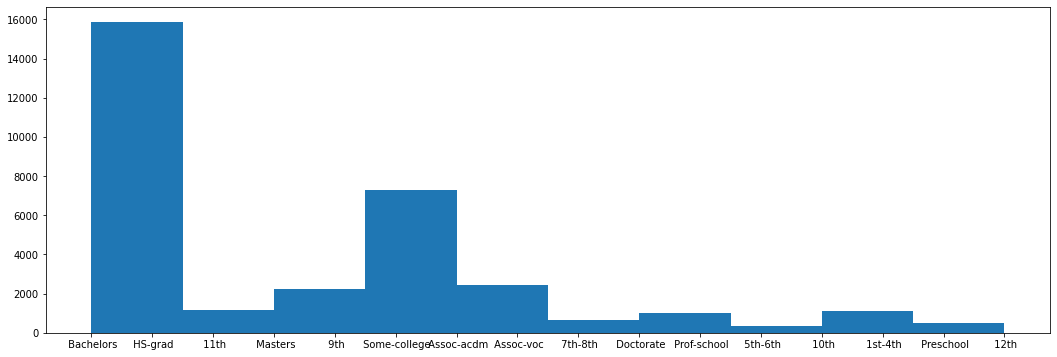

In [117]:
plt.figure(figsize=(18,6),facecolor='w')
plt.hist(df['education'],histtype='bar',align='mid',orientation='vertical',)

#####**Data Cleaning**

In [118]:
#Checking null in the dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [119]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

df_adult=df.apply(LabelEncoder().fit_transform)
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


In [120]:
workclass=np.unique(df_adult['workclass'].values)
le_workclass=pd.DataFrame(workclass,columns=['code'])
workclass_map=pd.concat([map_workclass,le_workclass],axis=1)
workclass_map

,map_workclass,code
0,?,0
1,Federal-gov,1
2,Local-gov,2
3,Never-worked,3
4,Private,4
5,Self-emp-inc,5
6,Self-emp-not-inc,6
7,State-gov,7
8,Without-pay,8


In [121]:
education=np.unique(df_adult['education'].values)
le_education=pd.DataFrame(education,columns=['code'])
education_map=pd.concat([map_education,le_education],axis=1)
education_map

,map_education,code
0,10th,0
1,11th,1
2,12th,2
3,1st-4th,3
4,5th-6th,4
5,7th-8th,5
6,9th,6
7,Assoc-acdm,7
8,Assoc-voc,8
9,Bachelors,9


In [122]:
status=np.unique(df_adult['marital-status'].values)
le_status=pd.DataFrame(status,columns=['code'])
status_map=pd.concat([map_status,le_status],axis=1)
status_map

,map_status,code
0,Divorced,0
1,Married-AF-spouse,1
2,Married-civ-spouse,2
3,Married-spouse-absent,3
4,Never-married,4
5,Separated,5
6,Widowed,6


In [123]:
occupation=np.unique(df_adult['occupation'].values)
le_occupation=pd.DataFrame(occupation,columns=['code'])
occupation_map=pd.concat([map_occupation,le_occupation],axis=1)
occupation_map

,map_occupation,code
0,?,0
1,Adm-clerical,1
2,Armed-Forces,2
3,Craft-repair,3
4,Exec-managerial,4
5,Farming-fishing,5
6,Handlers-cleaners,6
7,Machine-op-inspct,7
8,Other-service,8
9,Priv-house-serv,9


In [124]:
relationship=np.unique(df_adult['relationship'].values)
le_relationship=pd.DataFrame(relationship,columns=['code'])
relationship_map=pd.concat([map_relationship,le_relationship],axis=1)
relationship_map

,map_relationship,code
0,Husband,0
1,Not-in-family,1
2,Other-relative,2
3,Own-child,3
4,Unmarried,4
5,Wife,5


In [125]:
race=np.unique(df_adult['race'].values)
le_race=pd.DataFrame(race,columns=['code'])
race_map=pd.concat([map_race,le_race],axis=1)
race_map

,map_race,code
0,Amer-Indian-Eskimo,0
1,Asian-Pac-Islander,1
2,Black,2
3,Other,3
4,White,4


In [126]:
sex=np.unique(df_adult['sex'].values)
le_sex=pd.DataFrame(sex,columns=['code'])
sex_map=pd.concat([map_sex,le_sex],axis=1)
sex_map

,map_sex,code
0,Female,0
1,Male,1


In [127]:
country=np.unique(df_adult['country'].values)
le_country=pd.DataFrame(country,columns=['code'])
country_map=pd.concat([map_country,le_country],axis=1)
country_map

,map_country,code
0,?,0
1,Cambodia,1
2,Canada,2
3,China,3
4,Columbia,4
5,Cuba,5
6,Dominican-Republic,6
7,Ecuador,7
8,El-Salvador,8
9,England,9


In [128]:
salary=np.unique(df_adult['salary'].values)
le_salary=pd.DataFrame(salary,columns=['code'])
salary_map=pd.concat([map_salary,le_salary],axis=1)
salary_map

,map_salary,code
0,<=50K,0
1,>50K,1


### **1. 모든 Classification 방법**

#### **a. 로지스틱 회귀방법 (Logistic Regression)**

In [ ]:
# from sklearn.linear_model import LogisticRegression
# def lr_clf(C):
#     model = LogisticRegression(C=C, random_state=0)
#     scores = cross_val_score(model, X, y, cv=5)
#     return scores.mean()
# print(lr_clf(C=0.1))

In [150]:
#Importing the Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [130]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [131]:
#Choosing the X (predictors) and Y (target)
y=df_adult['salary']
X=df_adult.drop(df_adult[['fnlwgt','salary']], axis=1)
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,22,7,9,12,4,1,1,4,1,25,0,39,39
1,33,6,9,12,2,4,0,4,1,0,0,12,39
2,21,4,11,8,0,6,1,4,1,0,0,39,39
3,36,4,1,6,2,6,0,2,1,0,0,39,39
4,11,4,9,12,2,10,5,2,0,0,0,39,5


In [132]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [133]:
#Split Train and Test Set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [136]:
#Standard Scaling
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)

In [137]:
#Fit to the LOGISTIC REGRESSION
logreg=LogisticRegression(C=100.0,random_state=1,solver='lbfgs',multi_class='ovr')
logreg.fit(X_train_std,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [141]:
#The predicted y
y_pred=logreg.predict(X_test_std)
print('Misclassified predictions: %d' % (y_test != y_pred).sum())

Misclassified predictions: 1133


In [142]:
#The accuracy
print('Model Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Model Accuracy: 0.826


In [145]:
#Classification Report with SKLearn
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.72      0.45      0.56      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.83      0.81      6513



In [148]:
#The Confusion Matrix
con_mat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(con_mat)

[[4671  274]
 [ 859  709]]


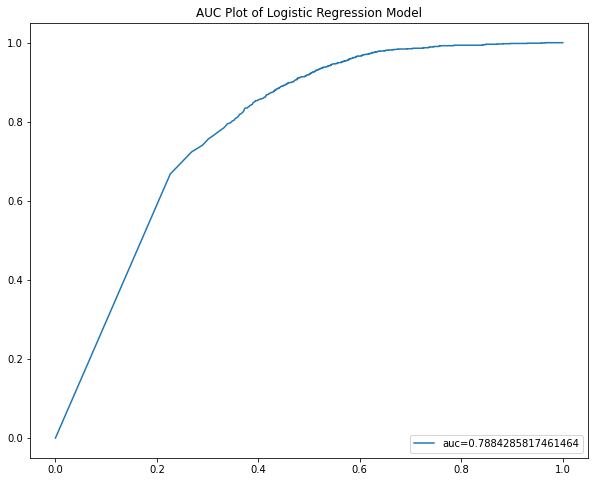

In [152]:
#Plotting the AUC
y_pred_prob=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(10,8),facecolor='w')
plt.title("AUC Plot of Logistic Regression Model")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### **b. SVM (Support Vector Machine)**

In [ ]:
# from sklearn.svm import SVC
# def svm_clf(C, gamma):
#     model = SVC(C=C, gamma=gamma, random_state=0)
#     scores = cross_val_score(model, X, y, cv=5)
#     return scores.mean()
# print(svm_clf(C=0.1, gamma=0.001))

In [153]:
#Importing the Libraries
from sklearn.svm import SVC

In [154]:
#The Model: Support Vector Machine
svm=SVC(kernel='linear',C=1.0,random_state=1)

In [156]:
svm_fit=svm.fit(X_train_std,y_train)
y_pred_svm=svm.predict(X_test_std)
y_test_score=svm_fit.decision_function(X_test)
prediction=svm_fit.predict(X_test)
print(y_test_score)
print(prediction)

[ 9.34880005  8.02674277 55.99373716 ... 62.38480405  9.07287526
 11.06949754]
[1 1 1 ... 1 1 1]


In [157]:
#SVM Accuracy
print('Model Accuracy: %.3f' % accuracy_score(y_test,y_pred_svm))

Model Accuracy: 0.807


In [158]:
#SVM classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4945
           1       0.75      0.30      0.43      1568

    accuracy                           0.81      6513
   macro avg       0.78      0.63      0.66      6513
weighted avg       0.80      0.81      0.77      6513



In [159]:
#SVM Confusion Matrix
svm_conmat=confusion_matrix(y_true=y_test,y_pred=y_pred_svm)
print(svm_conmat)


[[4788  157]
 [1100  468]]


[ 9.34880005  8.02674277 55.99373716 ... 62.38480405  9.07287526
 11.06949754]
[1 1 1 ... 1 1 1]


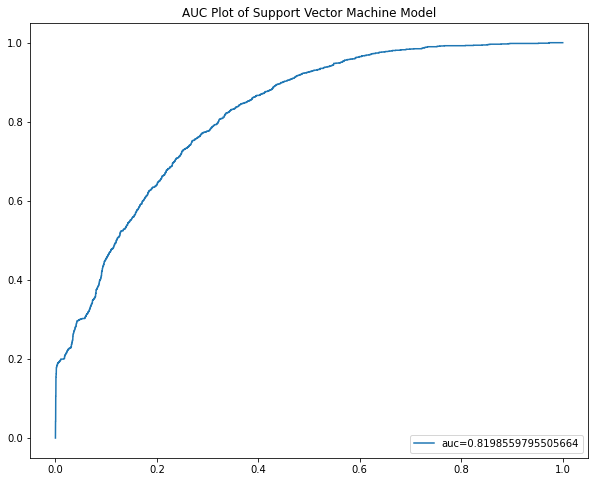

In [160]:
#Plotting the AUC
y_test_score=svm_fit.decision_function(X_test)
prediction=svm_fit.predict(X_test)
print(y_test_score)
print(prediction)

fpr,tpr,_=metrics.roc_curve(y_test,y_test_score)
auc = metrics.roc_auc_score(y_test,y_test_score)
plt.figure(figsize=(10,8),facecolor='w')
plt.title("AUC Plot of Support Vector Machine Model")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### **c. 랜덤 포레스트 (Random Forest)**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(n_estimators=1000)
# scores = cross_val_score(forest, X, y, cv=10)
# print(scores.mean())

In [163]:
#Importing the Library
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf=RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [165]:
y_pred_rf=rf.predict(X_test)

In [166]:
#Random Forest (RF) Accuracy
print('RF Accuracy: %.3f' % accuracy_score(y_test,y_pred_rf))

RF Accuracy: 0.849


In [169]:
#RF Classification Report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.72      0.62      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [170]:
#RF Confusion Matrix
rf_conmat=confusion_matrix(y_true=y_test,y_pred=y_pred_rf)
print(rf_conmat)

[[4564  381]
 [ 602  966]]


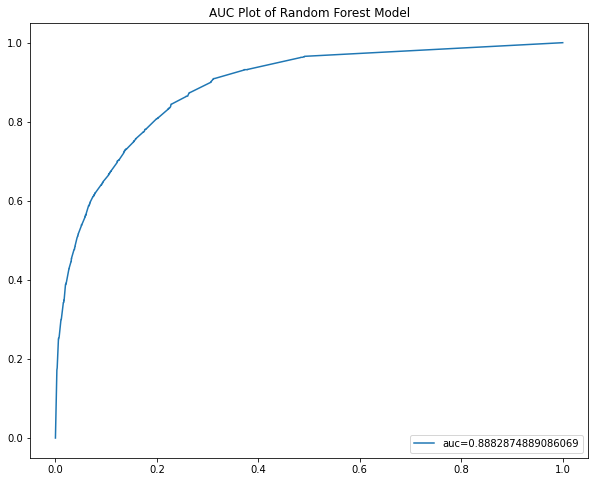

In [171]:
#RF AUC Plot
y_pred_prob=rf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(10,8),facecolor='w')
plt.title("AUC Plot of Random Forest Model")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### **d. k-NN (k-Nearest Neighbors)**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# k = 10
# knn = KNeighborsClassifier(n_neighbors = k)
# knn = knn.fit_transform(X, y)
# knn.predict(future_data)

In [173]:
#Importing the Library
from sklearn.neighbors import KNeighborsClassifier

In [174]:
#KNN Model
knn=KNeighborsClassifier(n_neighbors=8,p=13,metric='minkowski')
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=13,
                     weights='uniform')

In [175]:
y_pred_KNN=knn.predict(X_test_std)

In [176]:
#KNN Accuracy
print('KNN Accuracy: %.3f' % accuracy_score(y_test,y_pred_KNN))

KNN Accuracy: 0.837


In [177]:
#KNN Classification Report
knn_conmat=confusion_matrix(y_true=y_test,y_pred=y_pred_KNN)
print(knn_conmat)

[[4606  339]
 [ 722  846]]


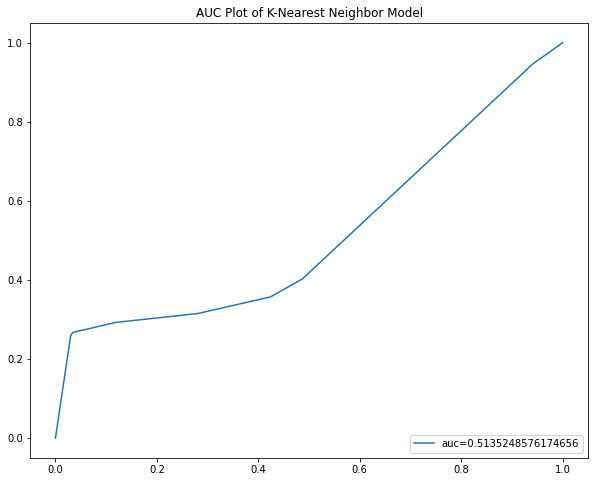

In [178]:
#KNN AUC Plot
y_pred_prob=knn.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)
auc=metrics.roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(10,8),facecolor='w')
plt.title("AUC Plot of K-Nearest Neighbor Model")
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### **e. DNN (Deep Neural Network)**

https://www.tensorflow.org/tutorials/structured_data/feature_columns

https://www.kaggle.com/c/petfinder-adoption-prediction/data

###**2. L1 Regulation in Logistic Regression for Feature Selection and Random Forest for Feature Importance**

https://medium.com/shortcutnlp/05-model-application-how-to-compare-and-choose-the-best-ml-model-b7cfff804c08